**Author**: Simon Richard

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('../data/train.csv')
df.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dd = pd.read_csv('../data/data_dictionary.csv')
dd.set_index('Field', inplace=True)

In [9]:
cols = list(filter(lambda x: x.startswith('BIA'), df.columns))
col_names = {col: dd['Description'][col] for col in cols}
col_names

{'BIA-Season': 'Season of participation',
 'BIA-BIA_Activity_Level_num': 'Activity Level',
 'BIA-BIA_BMC': 'Bone Mineral Content',
 'BIA-BIA_BMI': 'Body Mass Index',
 'BIA-BIA_BMR': 'Basal Metabolic Rate',
 'BIA-BIA_DEE': 'Daily Energy Expenditure',
 'BIA-BIA_ECW': 'Extracellular Water',
 'BIA-BIA_FFM': 'Fat Free Mass',
 'BIA-BIA_FFMI': 'Fat Free Mass Index',
 'BIA-BIA_FMI': 'Fat Mass Index',
 'BIA-BIA_Fat': 'Body Fat Percentage',
 'BIA-BIA_Frame_num': 'Body Frame',
 'BIA-BIA_ICW': 'Intracellular Water',
 'BIA-BIA_LDM': 'Lean Dry Mass',
 'BIA-BIA_LST': 'Lean Soft Tissue',
 'BIA-BIA_SMM': 'Skeletal Muscle Mass',
 'BIA-BIA_TBW': 'Total Body Water'}

BIA-BIA_Activity_Level_num
Min: 1.0 | Max: 5.0
BIA-BIA_BMC
Min: -7.78961 | Max: 4115.36
BIA-BIA_BMI
Min: 0.0482667 | Max: 53.9243
BIA-BIA_BMR
Min: 813.397 | Max: 83152.2
BIA-BIA_DEE
Min: 1073.45 | Max: 124728.0
BIA-BIA_ECW
Min: 1.78945 | Max: 3233.0
BIA-BIA_FFM
Min: 28.9004 | Max: 8799.08
BIA-BIA_FFMI
Min: 7.86485 | Max: 217.771
BIA-BIA_FMI
Min: -194.163 | Max: 28.2515
BIA-BIA_Fat
Min: -8745.08 | Max: 153.82
BIA-BIA_Frame_num
Min: 1.0 | Max: 3.0
BIA-BIA_ICW
Min: 14.489 | Max: 2457.91
BIA-BIA_LDM
Min: 4.63581 | Max: 3108.17
BIA-BIA_LST
Min: 23.6201 | Max: 4683.71
BIA-BIA_SMM
Min: 4.65573 | Max: 3607.69
BIA-BIA_TBW
Min: 20.5892 | Max: 5690.91


/tmp/ipykernel_33174/1642448047.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


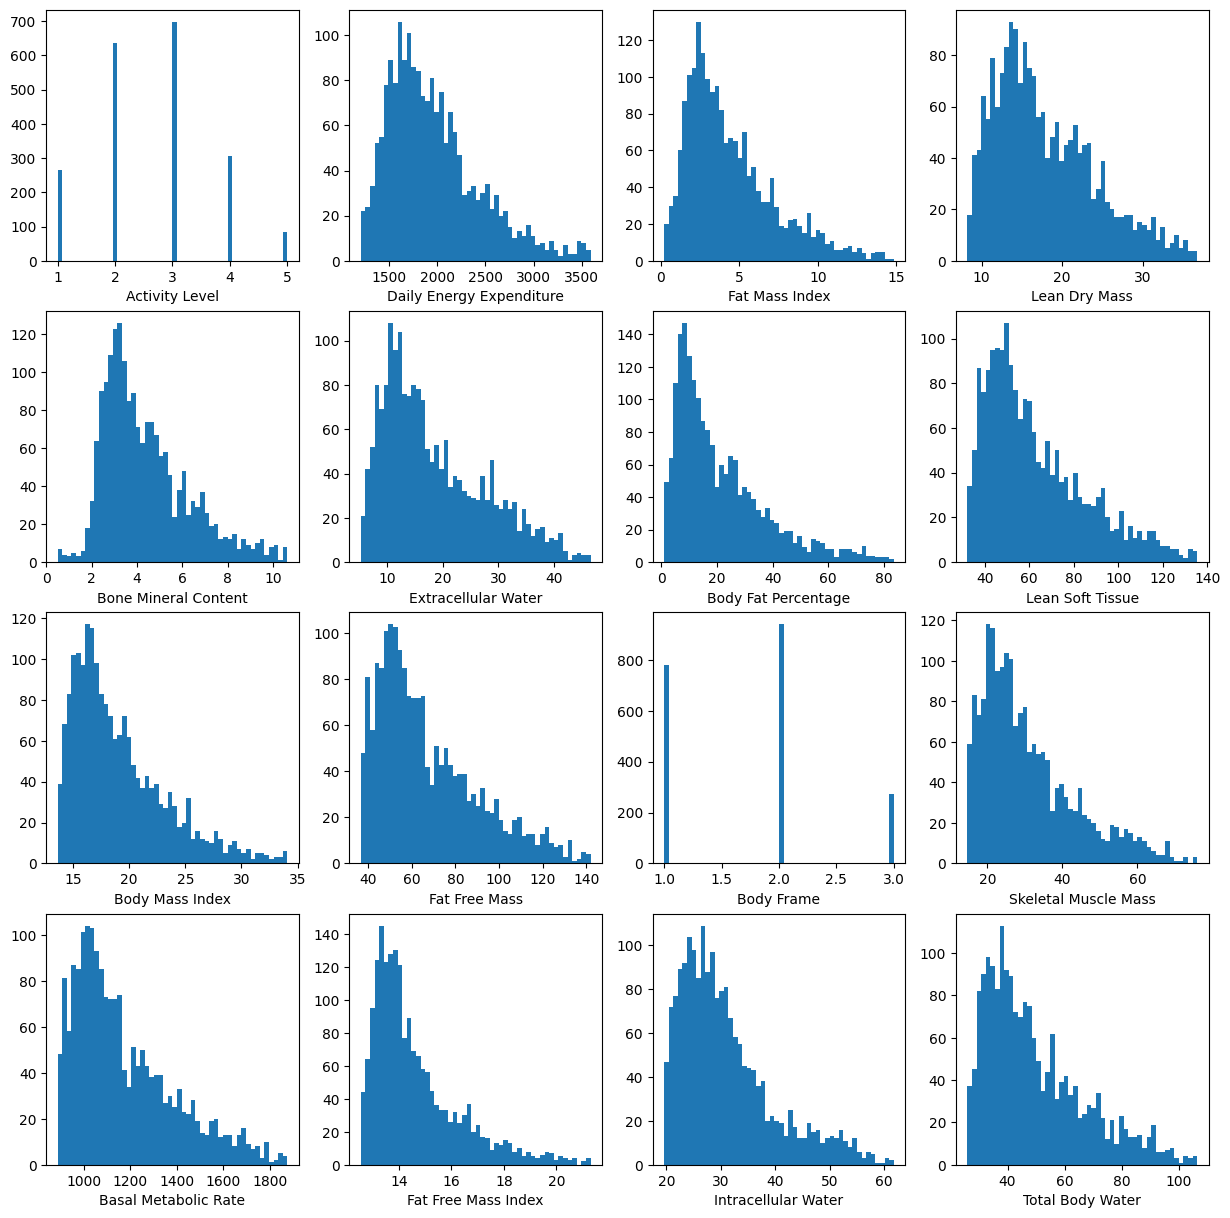

In [19]:
fig, axes = plt.subplots(4, 4, figsize=(15, 15)) 
i = 0
for col in cols:
    if col == 'BIA-Season':
        continue

    print(col)

    x = df[col].dropna()
    low = np.percentile(x, 2)
    high = np.percentile(x, 98)

    print('Min:', x.min(), '|', 'Max:', x.max())
    
    axes[i % 4, i // 4].hist(x, bins=50, range=(low, high))
    axes[i % 4, i // 4].set_xlabel(col_names[col])
    # axes[i % 4, i // 4].set_ylabel('Frequency')
    i += 1

fig.show()

It seems like some of the outliers might be data entry errors. At some point we could go column-by-column and research typical values, but for now let's plan to remove all of the outliers.

In [20]:
from scipy.stats import f_oneway
for col in cols:
    if col == 'BIA-Season':
        continue

    stat, pvalue = f_oneway(*[
        df[
            (df['BIA-Season'] == season) &
                df[col].notna()
        ][col]
            for season in ['Winter', 'Spring', 'Summer', 'Fall']
    ])
    
    if pvalue < 0.05:
        print(col, stat, pvalue)